In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from statannot import add_stat_annotation

import seaborn as sns

In [2]:
motion_data = pd.read_csv('../data/motion_data.csv', dtype={'Subject': str})
motion_data = motion_data.set_index('Subject')
print(motion_data.shape)
motion_data.head()

(176, 42)


,REST1_7T_PA_Movement_RelativeRMS_mean,REST4_7T_AP_Movement_RelativeRMS_mean,MOVIE1_7T_AP_Movement_RelativeRMS_mean,MOVIE2_7T_PA_Movement_RelativeRMS_mean,MOVIE3_7T_PA_Movement_RelativeRMS_mean,MOVIE4_7T_AP_Movement_RelativeRMS_mean,twomen_Movement_RelativeRMS_mean,twomen_SameRestBlock_Movement_RelativeRMS_mean,bridgeville_Movement_RelativeRMS_mean,bridgeville_SameRestBlock_Movement_RelativeRMS_mean,...,testretest3_Movement_RelativeRMS_mean,testretest3_SameRestBlock_Movement_RelativeRMS_mean,homealone_Movement_RelativeRMS_mean,homealone_SameRestBlock_Movement_RelativeRMS_mean,brokovich_Movement_RelativeRMS_mean,brokovich_SameRestBlock_Movement_RelativeRMS_mean,starwars_Movement_RelativeRMS_mean,starwars_SameRestBlock_Movement_RelativeRMS_mean,testretest4_Movement_RelativeRMS_mean,testretest4_SameRestBlock_Movement_RelativeRMS_mean
Subject,,,,,,,,,,,,,,,,,,,,,
100610,0.189720,0.202442,0.257122,0.178953,0.201716,0.240824,0.236890,0.185046,0.256907,0.200981,...,0.175173,0.222635,0.266509,0.210919,0.224917,0.188151,0.223301,0.206211,0.225108,0.221235
102311,0.052503,0.139191,0.083210,0.078969,0.103597,0.094360,0.069553,0.034301,0.082522,0.046308,...,0.116895,0.205508,0.092981,0.092157,0.089541,0.127661,0.092229,0.170110,0.094974,0.216480
102816,0.176665,0.144463,0.228877,0.176782,0.156451,0.148720,0.244269,0.204551,0.214068,0.177889,...,0.160593,0.104056,0.120129,0.163572,0.175092,0.150123,0.159419,0.142212,0.157765,0.108316
104416,0.033487,0.049917,0.039493,0.026341,0.033266,0.047459,0.037161,0.033366,0.039644,0.030571,...,0.036085,0.060981,0.032223,0.043275,0.048406,0.051074,0.050632,0.050909,0.044528,0.059036
105923,0.089230,0.085400,0.067668,0.053143,0.057233,0.060469,0.046845,0.066958,0.063070,0.081087,...,0.071290,0.089402,0.060022,0.085631,0.060148,0.081186,0.059056,0.086288,0.070253,0.088610


In [3]:
motion_data.rename(columns = {"REST1_7T_PA_Movement_RelativeRMS_mean": "REST1", 
                              "REST4_7T_AP_Movement_RelativeRMS_mean": "REST4",
                              "MOVIE1_7T_AP_Movement_RelativeRMS_mean": "MOVIE1",
                              "MOVIE2_7T_PA_Movement_RelativeRMS_mean": "MOVIE2",
                              "MOVIE3_7T_PA_Movement_RelativeRMS_mean": "MOVIE3",
                              "MOVIE4_7T_AP_Movement_RelativeRMS_mean": "MOVIE4",
}, inplace=True
)

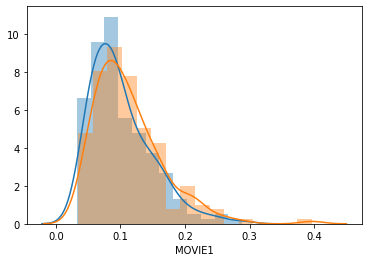

In [4]:
sns.distplot(motion_data["REST1"])
sns.distplot(motion_data["MOVIE1"])

In [5]:
data_long = pd.melt(motion_data.reset_index(), id_vars='Subject', var_name='Condition', value_name='Motion')
data_long.set_index('Subject', inplace=True)
data_long.head()

,Condition,Motion
Subject,,
100610,REST1,0.189720
102311,REST1,0.052503
102816,REST1,0.176665
104416,REST1,0.033487
105923,REST1,0.089230


In [6]:
cols_of_interest = ["REST1", "MOVIE1", "MOVIE2", "REST4", "MOVIE3", "MOVIE4"]

Performing paired t-test on pair: ('REST1', 'MOVIE1') stat=-5.30e+00 p-value=3.40e-07
Performing paired t-test on pair: ('REST1', 'MOVIE2') stat=1.01e+00 p-value=3.15e-01
pvalues: [3.398571989797752e-07, 0.31486097744472197]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

REST1 v.s. MOVIE1: Custom statistical test, P_val:3.399e-07
REST1 v.s. MOVIE2: Custom statistical test, P_val:3.149e-01
Performing paired t-test on pair: ('REST4', 'MOVIE3') stat=8.88e+00 p-value=7.69e-16
Performing paired t-test on pair: ('REST4', 'MOVIE4') stat=3.32e+00 p-value=1.11e-03
pvalues: [7.691639506749661e-16, 0.0011129284890444447]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

REST4 v.s. MOVIE3: Custom statistical test, P_val:7.692e-16
REST4 v.s. MOVIE4: Custom statistical tes

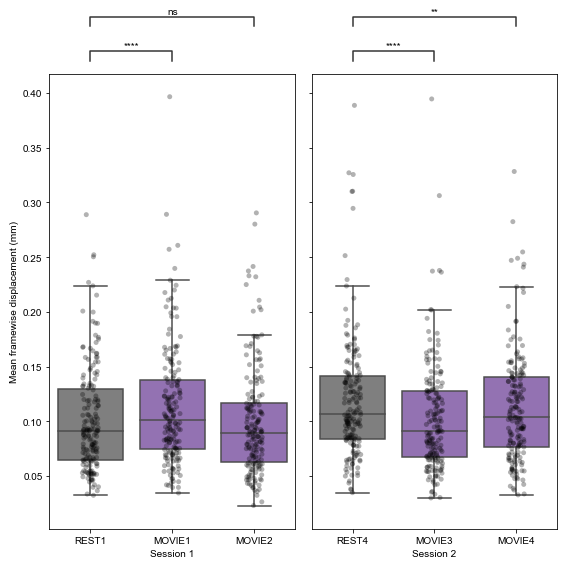

In [7]:
scan_order = ['REST1',
        'MOVIE1',
        'MOVIE2',
        'REST4',
        'MOVIE3',        
        'MOVIE4',
        ]

my_palette = {"REST1": "tab:gray", 
              "REST4": "tab:gray",
              "MOVIE1": "tab:purple",
              "MOVIE2": "tab:purple",
              "MOVIE3": "tab:purple",
              "MOVIE4": "tab:purple",
             }

# Plot group average
data = motion_data
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8), sharey=True)

# Do session 1
ax = ax1
order1 = ["REST1", "MOVIE1", "MOVIE2"]
sns.boxplot(data=data, 
              order=order1,
              palette=my_palette,
              ax=ax,
            showfliers=False
            ),
sns.stripplot(data=data, 
              ax=ax1,
             color="black", alpha = 0.3,
            order = order1,
             )

box_pairs=[("REST1", "MOVIE1"), ("REST1", "MOVIE2")]
test_short_name = 'paired t-test'
pvalues = []
for pair in box_pairs:
    data1 = data[pair[0]]
    data2 = data[pair[1]]
    nas = np.logical_or(np.isnan(data1), np.isnan(data2))
    stat, p = sp.stats.ttest_rel(data1[~nas], data2[~nas])
    print("Performing paired t-test on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)
test_results = add_stat_annotation(ax, data=data, order=order1,
                                  box_pairs=[("REST1", "MOVIE1"), ("REST1", "MOVIE2")],
                                  perform_stat_test=False, pvalues=pvalues,
                                  test_short_name=test_short_name, loc='outside'
                                  )

# Do session 2
ax = ax2
order1 = ["REST4", "MOVIE3", "MOVIE4"]
sns.boxplot(data=data, 
              order=order1,
              palette=my_palette,
              ax=ax,
            showfliers=False
            ),
sns.stripplot(data=data, 
              ax=ax,
             color="black", alpha = 0.3,
            order = order1,
             )

box_pairs=[("REST4", "MOVIE3"), ("REST4", "MOVIE4")]
test_short_name = 'paired t-test'
pvalues = []
for pair in box_pairs:
    data1 = data[pair[0]]
    data2 = data[pair[1]]
    nas = np.logical_or(np.isnan(data1), np.isnan(data2))
    stat, p = sp.stats.ttest_rel(data1[~nas], data2[~nas])
    print("Performing paired t-test on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)
test_results = add_stat_annotation(ax, data=data, order=order1,
                                  box_pairs=box_pairs,
                                  perform_stat_test=False, pvalues=pvalues,
                                  test_short_name=test_short_name, loc='outside'
                                  )

sns.set(style="white")
ax1.set_ylabel("Mean framewise displacement (mm)")
ax1.set_xlabel('Session 1')
ax2.set_xlabel('Session 2')
ax2.yaxis.label.set_visible(False)

fig.tight_layout()

Need to run the "helper_combine_behav_data" notebook before proceeding to the next cell.

In [8]:
all_data = pd.read_csv('../data/all_data.csv', dtype={'Subject': str})
all_data = all_data.set_index('Subject')
subj_list = np.load('subj_list.npy', allow_pickle=True)
all_data = all_data.loc[subj_list]
print(all_data.shape)
all_data.head()

(176, 382)


,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100610,S900,Q08,M,26-30,True,2,1,4,100.0,True,...,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
102311,S500,Q06,F,26-30,True,1,1,4,100.0,True,...,4.4,122.25,110.45,1,52.2,98.31,99.06,1.80,0,1.80
102816,Q3,Q03,F,26-30,True,1,1,4,100.0,True,...,5.2,122.25,111.41,1,52.6,98.31,97.68,1.72,1,1.68
104416,S900,Q09,F,31-35,True,2,2,4,100.0,True,...,2.8,101.12,87.11,0,38.6,95.36,93.48,1.92,1,1.88
105923,MEG2,Q07,F,31-35,True,2,2,4,100.0,True,...,5.2,122.25,111.41,0,38.6,97.26,96.41,1.88,1,1.84


0.4400920967829216 (n.s)
0.15876166430273148 (n.s)
0.3862684450163283 (n.s)
0.7450551806504573 (n.s)
0.848376242447221 (n.s)
0.8733809571423798 (n.s)


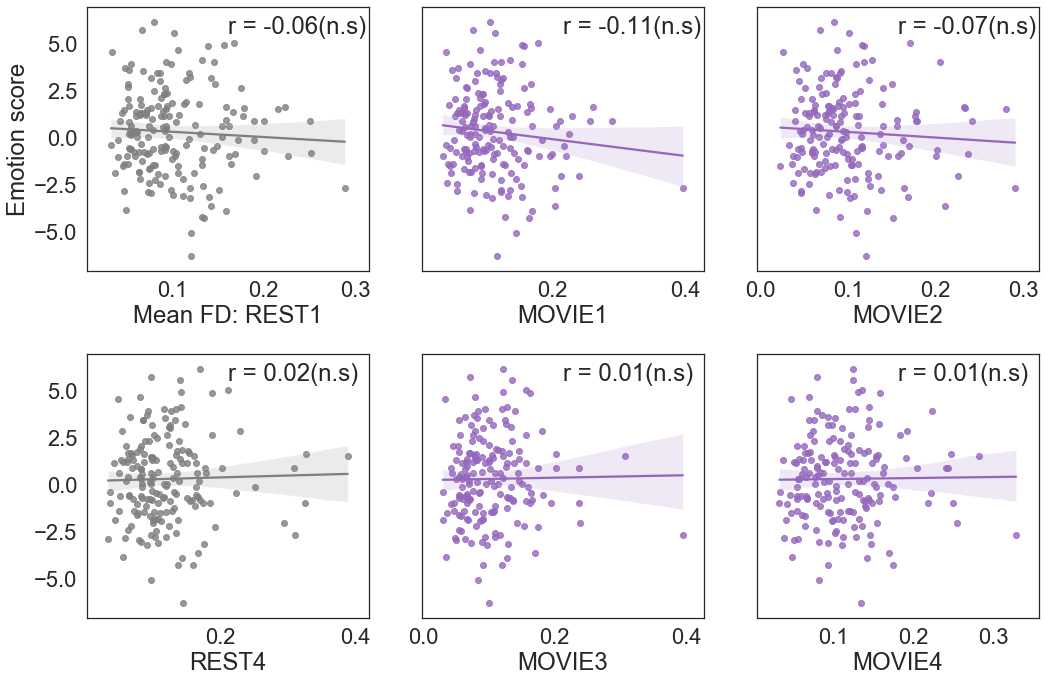

In [22]:
fig, axes = plt.subplots(2,3, figsize=(15,10), sharey=True)
axes = axes.flatten()

runs_of_interest = [
    "REST1_7T_PA",
    "MOVIE1_7T_AP",
    "MOVIE2_7T_PA",
    "REST4_7T_AP",
    "MOVIE3_7T_PA",
    "MOVIE4_7T_AP"
]


for r,run in enumerate(runs_of_interest):
    ax = axes[r]
    x = all_data[run + "_Movement_RelativeRMS_mean"]
    y = all_data["emot_PC1"]
    if 'REST' in run:
        color = "tab:gray"
    if 'MOVIE' in run:
        color = "tab:purple"
    sns.regplot(x=x, y=y, ax=ax, color=color)
    rval, p = sp.stats.pearsonr(x,y)
    if p > 0.05:
        star = '(n.s)'
    elif 0.01 < p < 0.05:
        star = '*'
    elif 0.001 < p < 0.01:
        star = '**'
    elif 0.0001 < p < 0.001:
        star = '***'
    elif p < 0.0001:
        star = '****'
    print(p,star)
    ax.annotate(''.join(["r = ", "{:.2f}".format(rval), star]), xy=(0.5, 0.9), xycoords='axes fraction')
    ax.set_xlabel(run.split('_')[0] + "_motion")
    # ax.set_title(run.split('_')[0])
    if r==0:
        ax.set_ylabel('Emotion score')
        ax.set_xlabel('Mean FD: '+run.split('_')[0])
    if r>0:
        ax.set_ylabel('')
        ax.set_xlabel(run.split('_')[0])

sns.set(font_scale=2, style="white")
fig.tight_layout()

In [50]:
sp.stats.pearsonr(all_data["REST1_7T_PA_Movement_RelativeRMS_mean"], all_data["MOVIE2_7T_PA_Movement_RelativeRMS_mean"])

(0.8341441708786836, 7.834553905979326e-47)

In [16]:
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def rz_ci(r, n, conf_level = 0.95):
    zr_se = pow(1/(n - 3), .5)
    moe = norm.ppf(1 - (1 - conf_level)/float(2)) * zr_se
    zu = atanh(r) + moe
    zl = atanh(r) - moe
    return tanh((zl, zu))

def rho_rxy_rxz(rxy, rxz, ryz):
    num = (ryz-1/2.*rxy*rxz)*(1-pow(rxy,2)-pow(rxz,2)-pow(ryz,2))+pow(ryz,3)
    den = (1 - pow(rxy,2)) * (1 - pow(rxz,2))
    return num/float(den)

def dependent_corr(xy, xz, yz, n, twotailed=True, conf_level=0.95, method='steiger'):
    """
    Calculates the statistic significance between two dependent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between x and z
    @param yz: correlation coefficient between y and z
    @param n: number of elements in x, y and z
    @param twotailed: whether to calculate a one or two tailed test, only works for 'steiger' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'steiger' or 'zou'
    @return: t and p-val
    """
    if method == 'steiger':
        d = xy - xz
        determin = 1 - xy * xy - xz * xz - yz * yz + 2 * xy * xz * yz
        av = (xy + xz)/2
        cube = (1 - yz) * (1 - yz) * (1 - yz)

        t2 = d * np.sqrt((n - 1) * (1 + yz)/(((2 * (n - 1)/(n - 3)) * determin + av * av * cube)))
        p = 1 - t.cdf(abs(t2), n - 3)

        if twotailed:
            p *= 2

        return t2, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(xz, n, conf_level=conf_level)[0]
        U2 = rz_ci(xz, n, conf_level=conf_level)[1]
        rho_r12_r13 = rho_rxy_rxz(xy, xz, yz)
        lower = xy - xz - pow((pow((xy - L1), 2) + pow((U2 - xz), 2) - 2 * rho_r12_r13 * (xy - L1) * (U2 - xz)), 0.5)
        upper = xy - xz + pow((pow((U1 - xy), 2) + pow((xz - L2), 2) - 2 * rho_r12_r13 * (U1 - xy) * (xz - L2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

In [21]:
run_pairs=[("REST1_7T_PA", "MOVIE1_7T_AP"),
           ("REST1_7T_PA", "MOVIE2_7T_PA"),
           ("REST4_7T_AP", "MOVIE3_7T_PA"), 
           ("REST4_7T_AP", "MOVIE4_7T_AP")]

for pair in run_pairs:
    print(pair)
    
    run1 = pair[0]
    run2 = pair[1]

    x = all_data["cogn_PC1"]
    y = all_data[run1 + "_Movement_RelativeRMS_mean"]
    z = all_data[run2 + "_Movement_RelativeRMS_mean"]

    xy = sp.stats.pearsonr(x,y)[0]
    xz = sp.stats.pearsonr(x,z)[0]
    yz = sp.stats.pearsonr(y,z)[0]

    print(dependent_corr(xy, xz, yz, n = len(x)))

('REST1_7T_PA', 'MOVIE1_7T_AP')
(1.5943750298510735, 0.1126773547727733)
('REST1_7T_PA', 'MOVIE2_7T_PA')
(0.6623082018919407, 0.5086550522699653)
('REST4_7T_AP', 'MOVIE3_7T_PA')
(0.7167470159860675, 0.4744967212125042)
('REST4_7T_AP', 'MOVIE4_7T_AP')
(-0.678324372101004, 0.49847236522688876)
